In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# Get selling price information
df = pd.read_csv("../../../res/car-data.csv")
selling_price = df["Selling_Price"]
selling_price.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [11]:
# Measure of central tendency (mean median mode midrange)
print("mean: " + str(selling_price.mean()))
print("median: " + str(selling_price.median()))
print("mode: " + str(selling_price.mode()))

mean: 4.661295681063123
median: 3.6
mode: 0    0.45
1    0.60
dtype: float64


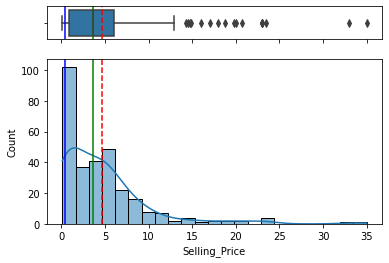

4.661295681063123
3.6
0.45


In [18]:
# Visualise mean median mode
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=selling_price.mean()
median=selling_price.median()
mode=selling_price.mode().values[0]

sns.boxplot(data=df, x="Selling_Price", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Selling_Price", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_box.set(xlabel='')
plt.show()

print(mean)
print(median)
print(mode)

In [ ]:
# Measures of Relative Location (percentile decile quartile interquartile range)

In [ ]:
# Range variance standard deviation

In [ ]:
# Coefficient of variation